# COMP 6321 Machine Learning
## Assignment 4 Answers
### Name : [Parsa Kamalipour](https://benymaxparsa.github.io) , StudentID : 40310734

### Exercise 1: CNN Implementation (12 pts)

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot as plt

#### Exercise 1, Question 1: Implement and train a VGG11 net on the MNIST dataset. (4 pts)

In [2]:
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")

In [3]:
# Transform to resize MNIST images to 32x32
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [4]:
# Load MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



29.8%

100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
# Define the VGG11 model
class VGG11(nn.Module):
    def __init__(self):
        super(VGG11, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(512, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [6]:
# Instantiate model
model = VGG11().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [7]:
# Training loop
epochs = 20
for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

# Save the model
PATH = './vgg11_mnist.pth'
torch.save(model.state_dict(), PATH)

print('Model saved to', PATH)


[Epoch 1, Batch 100] Loss: 0.545
[Epoch 1, Batch 200] Loss: 0.143
[Epoch 1, Batch 300] Loss: 0.112
[Epoch 1, Batch 400] Loss: 0.072
[Epoch 1, Batch 500] Loss: 0.067
[Epoch 1, Batch 600] Loss: 0.062
[Epoch 1, Batch 700] Loss: 0.053
[Epoch 1, Batch 800] Loss: 0.065
[Epoch 1, Batch 900] Loss: 0.055
[Epoch 2, Batch 100] Loss: 0.039
[Epoch 2, Batch 200] Loss: 0.037
[Epoch 2, Batch 300] Loss: 0.047
[Epoch 2, Batch 400] Loss: 0.041
[Epoch 2, Batch 500] Loss: 0.042
[Epoch 2, Batch 600] Loss: 0.036
[Epoch 2, Batch 700] Loss: 0.039
[Epoch 2, Batch 800] Loss: 0.033
[Epoch 2, Batch 900] Loss: 0.032
[Epoch 3, Batch 100] Loss: 0.023
[Epoch 3, Batch 200] Loss: 0.023
[Epoch 3, Batch 300] Loss: 0.019
[Epoch 3, Batch 400] Loss: 0.025
[Epoch 3, Batch 500] Loss: 0.030
[Epoch 3, Batch 600] Loss: 0.024
[Epoch 3, Batch 700] Loss: 0.028
[Epoch 3, Batch 800] Loss: 0.032
[Epoch 3, Batch 900] Loss: 0.026
[Epoch 4, Batch 100] Loss: 0.020
[Epoch 4, Batch 200] Loss: 0.016
[Epoch 4, Batch 300] Loss: 0.017
[Epoch 4, 

#### Exercise 1, Question 2: Plot it (0.5 pts)


In [8]:
# Load the trained model
model = VGG11().to(device)
model.load_state_dict(torch.load('./vgg11_mnist.pth'))
model.eval()

# Define loss function
criterion = torch.nn.CrossEntropyLoss()

# Lists to store metrics
epochs = 20
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

In [9]:
# Function to calculate accuracy
def calculate_accuracy(loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Function to calculate loss
def calculate_loss(loader):
    running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
    return running_loss / len(loader)

In [10]:
# Evaluate the model after each epoch and store metrics
for epoch in range(epochs):
    running_loss = 0.0
    model.train()
    for i, (inputs, labels) in enumerate(trainloader, 0):
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()

    # Calculate and store training metrics
    train_losses.append(running_loss / len(trainloader))
    train_accuracies.append(calculate_accuracy(trainloader))

    # Calculate and store test metrics
    model.eval()
    test_losses.append(calculate_loss(testloader))
    test_accuracies.append(calculate_accuracy(testloader))

    print(f'Epoch {epoch + 1}/{epochs} - Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.2f}%, Test Acc: {test_accuracies[-1]:.2f}%')

Epoch 1/20 - Train Loss: 0.0012, Test Loss: 0.0256, Train Acc: 99.96%, Test Acc: 99.51%
Epoch 2/20 - Train Loss: 0.0044, Test Loss: 0.0248, Train Acc: 99.93%, Test Acc: 99.43%
Epoch 3/20 - Train Loss: 0.0035, Test Loss: 0.0271, Train Acc: 99.94%, Test Acc: 99.42%
Epoch 4/20 - Train Loss: 0.0009, Test Loss: 0.0272, Train Acc: 99.97%, Test Acc: 99.47%
Epoch 5/20 - Train Loss: 0.0009, Test Loss: 0.0226, Train Acc: 99.99%, Test Acc: 99.55%
Epoch 6/20 - Train Loss: 0.0018, Test Loss: 0.0233, Train Acc: 99.99%, Test Acc: 99.52%
Epoch 7/20 - Train Loss: 0.0010, Test Loss: 0.0215, Train Acc: 99.97%, Test Acc: 99.59%
Epoch 8/20 - Train Loss: 0.0004, Test Loss: 0.0209, Train Acc: 100.00%, Test Acc: 99.57%
Epoch 9/20 - Train Loss: 0.0002, Test Loss: 0.0223, Train Acc: 100.00%, Test Acc: 99.61%
Epoch 10/20 - Train Loss: 0.0001, Test Loss: 0.0231, Train Acc: 100.00%, Test Acc: 99.58%
Epoch 11/20 - Train Loss: 0.0006, Test Loss: 0.0211, Train Acc: 100.00%, Test Acc: 99.64%
Epoch 12/20 - Train Loss: 

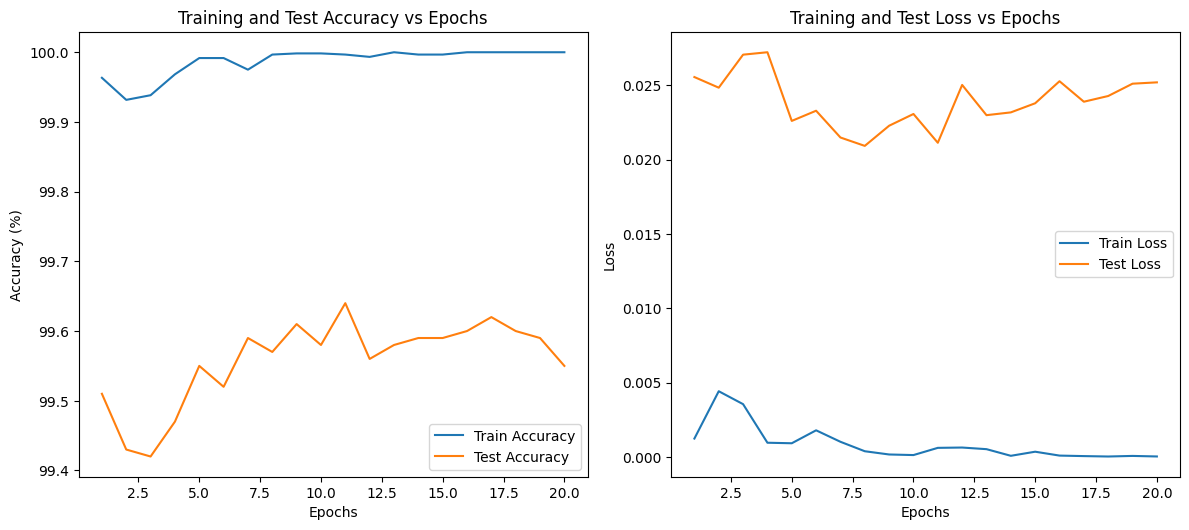

In [13]:
# Plotting
plt.figure(figsize=(12, 10))

# Training and test accuracy
plt.subplot(2, 2, 1)
plt.plot(range(1, epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy vs Epochs')
plt.legend()

# Training and test loss
plt.subplot(2, 2, 2)
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()


#### Exercise 1, Question 3: Analyzes the generalization properties of the VGG11 (2.5 pts)


In [21]:
# Define transforms including flipping, blurring, and adding Gaussian noise
transform_horizontal_flip = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip(p=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_vertical_flip = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomVerticalFlip(p=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_combined_flip = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip(p=1),
    transforms.RandomVerticalFlip(p=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_blur = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_noise_001 = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x + 0.01 * torch.randn_like(x)),
    transforms.Normalize((0.5,), (0.5,))
])

transform_noise_01 = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x + 0.1 * torch.randn_like(x)),
    transforms.Normalize((0.5,), (0.5,))
])

transform_noise_1 = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x + torch.randn_like(x)),
    transforms.Normalize((0.5,), (0.5,))
])

In [22]:
# Load MNIST test set with different transforms
horizontal_flipset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_horizontal_flip)
horizontal_fliploader = torch.utils.data.DataLoader(horizontal_flipset, batch_size=64, shuffle=False)

vertical_flipset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_vertical_flip)
vertical_fliploader = torch.utils.data.DataLoader(vertical_flipset, batch_size=64, shuffle=False)

combined_flipset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_combined_flip)
combined_fliploader = torch.utils.data.DataLoader(combined_flipset, batch_size=64, shuffle=False)


blurset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_blur)
blurloader = torch.utils.data.DataLoader(blurset, batch_size=64, shuffle=False)

noiseset_001 = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_noise_001)
noiseloader_001 = torch.utils.data.DataLoader(noiseset_001, batch_size=64, shuffle=False)

noiseset_01 = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_noise_01)
noiseloader_01 = torch.utils.data.DataLoader(noiseset_01, batch_size=64, shuffle=False)

noiseset_1 = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_noise_1)
noiseloader_1 = torch.utils.data.DataLoader(noiseset_1, batch_size=64, shuffle=False)

In [23]:
# Load the trained model
model = VGG11().to(device)
model.load_state_dict(torch.load('./vgg11_mnist.pth'))
model.eval()

/var/folders/fc/tcdc9mmn5y15gt0_l33gbxqh0000gn/T/ipykernel_68213/1492160786.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('./vgg11_mni

VGG11(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(

In [24]:
# Function to calculate accuracy
def calculate_accuracy(loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

In [25]:
# Calculate and print accuracies for transformations
original_accuracy = calculate_accuracy(torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])), batch_size=64, shuffle=False))

In [26]:
horizontal_flip_accuracy = calculate_accuracy(horizontal_fliploader)
vertical_flip_accuracy = calculate_accuracy(vertical_fliploader)
combined_flip_accuracy = calculate_accuracy(combined_fliploader)
blur_accuracy = calculate_accuracy(blurloader)
noise_accuracy_001 = calculate_accuracy(noiseloader_001)
noise_accuracy_01 = calculate_accuracy(noiseloader_01)
noise_accuracy_1 = calculate_accuracy(noiseloader_1)

print(f'Accuracy on Original Test Set: {original_accuracy:.2f}%')
print(f'Accuracy on Horizontally Flipped Test Set: {horizontal_flip_accuracy:.2f}%')
print(f'Accuracy on Vertically Flipped Test Set: {vertical_flip_accuracy:.2f}%')
print(f'Accuracy on Horizontally and Vertically Flipped Test Set: {combined_flip_accuracy:.2f}%')
print(f'Accuracy on Blurred Test Set: {blur_accuracy:.2f}%')
print(f'Accuracy on Test Set with Gaussian Noise (Variance 0.01): {noise_accuracy_001:.2f}%')
print(f'Accuracy on Test Set with Gaussian Noise (Variance 0.1): {noise_accuracy_01:.2f}%')
print(f'Accuracy on Test Set with Gaussian Noise (Variance 1): {noise_accuracy_1:.2f}%')


Accuracy on Original Test Set: 99.09%
Accuracy on Horizontally Flipped Test Set: 38.49%
Accuracy on Vertically Flipped Test Set: 41.79%
Accuracy on Horizontally and Vertically Flipped Test Set: 42.06%
Accuracy on Blurred Test Set: 97.65%
Accuracy on Test Set with Gaussian Noise (Variance 0.01): 99.09%
Accuracy on Test Set with Gaussian Noise (Variance 0.1): 98.84%
Accuracy on Test Set with Gaussian Noise (Variance 1): 10.55%


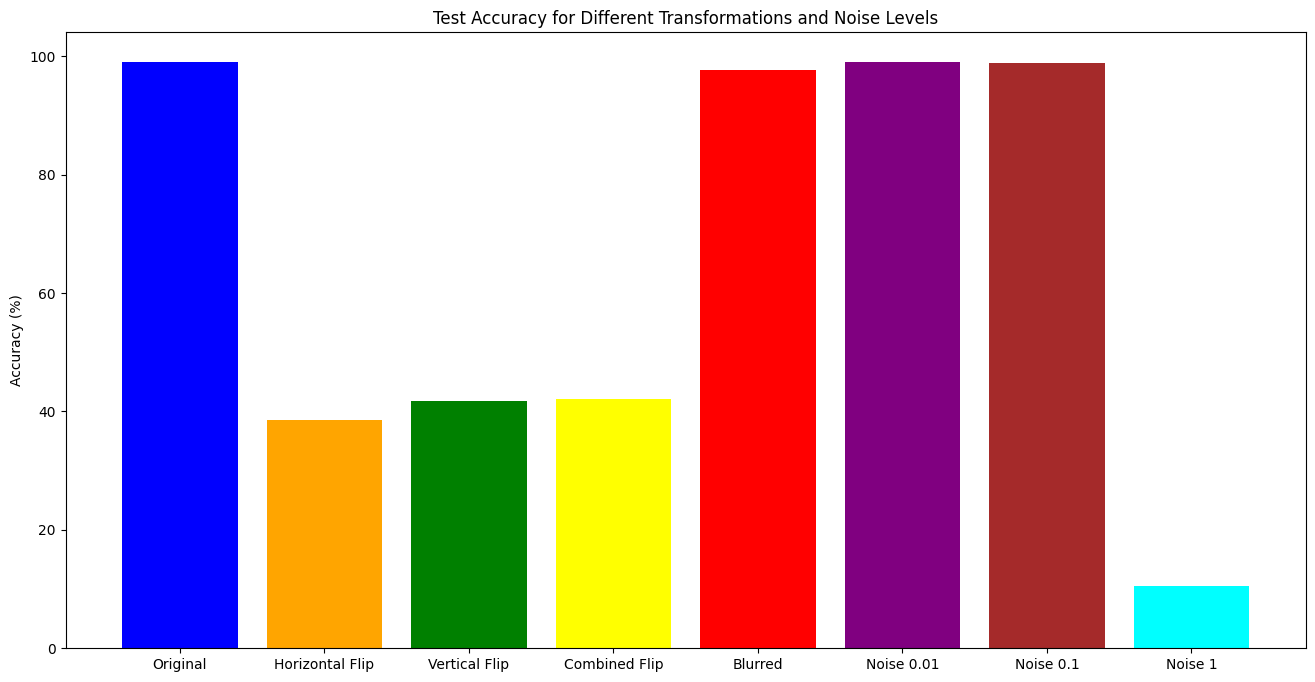

In [27]:
# Plot accuracies for better visualization
labels = ['Original', 'Horizontal Flip', 'Vertical Flip', 'Combined Flip', 'Blurred', 'Noise 0.01', 'Noise 0.1', 'Noise 1']
accuracies = [original_accuracy, horizontal_flip_accuracy, vertical_flip_accuracy, combined_flip_accuracy, blur_accuracy, noise_accuracy_001, noise_accuracy_01, noise_accuracy_1]

plt.figure(figsize=(16, 8))
plt.bar(labels, accuracies, color=['blue', 'orange', 'green', 'yellow', 'red', 'purple', 'brown', 'cyan'])
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy for Different Transformations and Noise Levels')
plt.show()

#### Exercise 1, Question 4 Data Augmentation (1,25 pts)

In [28]:
# Define data augmentation transforms
transform_train = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_test = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


In [29]:
# Load MNIST dataset with data augmentation for training set
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


In [30]:
model = VGG11().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


In [32]:
# Training loop with data augmentation
epochs = 20
train_losses = []
for epoch in range(epochs):
    running_loss = 0.0
    model.train()
    for i, (inputs, labels) in enumerate(trainloader, 0):
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

    train_losses.append(running_loss / len(trainloader))

print('Finished Training')

# Save the model
PATH = './vgg11_mnist_augmented.pth'
torch.save(model.state_dict(), PATH)
print('Model saved to', PATH)

[Epoch 1, Batch 100] Loss: 0.036
[Epoch 1, Batch 200] Loss: 0.046
[Epoch 1, Batch 300] Loss: 0.042
[Epoch 1, Batch 400] Loss: 0.036
[Epoch 1, Batch 500] Loss: 0.053
[Epoch 1, Batch 600] Loss: 0.036
[Epoch 1, Batch 700] Loss: 0.042
[Epoch 1, Batch 800] Loss: 0.043
[Epoch 1, Batch 900] Loss: 0.038
[Epoch 2, Batch 100] Loss: 0.040
[Epoch 2, Batch 200] Loss: 0.030
[Epoch 2, Batch 300] Loss: 0.045
[Epoch 2, Batch 400] Loss: 0.042
[Epoch 2, Batch 500] Loss: 0.033
[Epoch 2, Batch 600] Loss: 0.045
[Epoch 2, Batch 700] Loss: 0.033
[Epoch 2, Batch 800] Loss: 0.045
[Epoch 2, Batch 900] Loss: 0.043
[Epoch 3, Batch 100] Loss: 0.043
[Epoch 3, Batch 200] Loss: 0.041
[Epoch 3, Batch 300] Loss: 0.037
[Epoch 3, Batch 400] Loss: 0.033
[Epoch 3, Batch 500] Loss: 0.037
[Epoch 3, Batch 600] Loss: 0.044
[Epoch 3, Batch 700] Loss: 0.041
[Epoch 3, Batch 800] Loss: 0.034
[Epoch 3, Batch 900] Loss: 0.037
[Epoch 4, Batch 100] Loss: 0.032
[Epoch 4, Batch 200] Loss: 0.038
[Epoch 4, Batch 300] Loss: 0.043
[Epoch 4, 

In [33]:
# Evaluate the model on the test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy after Data Augmentation: {test_accuracy:.2f}%')


Test Accuracy after Data Augmentation: 99.03%


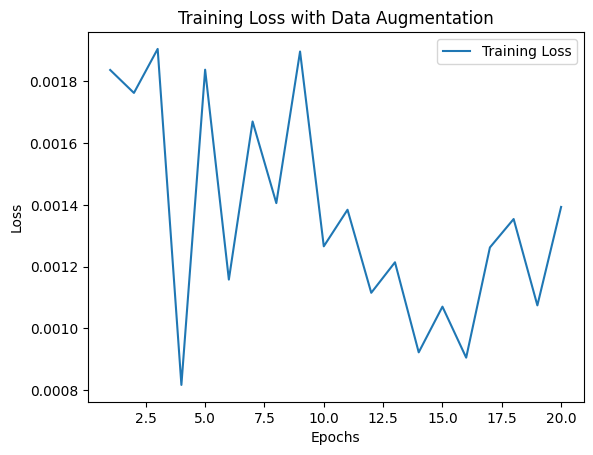

In [35]:
# Plot the training loss
plt.figure()
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss with Data Augmentation')
plt.legend()
plt.show()


#### Exercise 1, Question 5 Optimizer Comparison (1,25 pts)


In [36]:
# Define data transforms
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


In [37]:
# Training function
def train_model(model, optimizer, criterion, trainloader, testloader, epochs=10):
    train_accuracies = []
    test_accuracies = []

    for epoch in range(epochs):
        model.train()
        correct_train = 0
        total_train = 0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Calculate training accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = 100 * correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Evaluate on test set
        model.eval()
        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_accuracy = 100 * correct_test / total_test
        test_accuracies.append(test_accuracy)

        print(f'Epoch {epoch + 1}/{epochs}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

    return train_accuracies, test_accuracies


In [38]:
# Define loss function
criterion = nn.CrossEntropyLoss()

In [40]:
# Train using AdaDelta optimizer
model_adadelta = VGG11().to(device)
optimizer_adadelta = optim.Adadelta(model_adadelta.parameters(), lr=1.0)
print("Training with AdaDelta Optimizer:")
train_acc_adadelta, test_acc_adadelta = train_model(model_adadelta, optimizer_adadelta, criterion, trainloader, testloader, epochs=20)

# Train using Adam optimizer
model_adam = VGG11().to(device)
optimizer_adam = optim.Adam(model_adam.parameters(), lr=0.001)
print("\nTraining with Adam Optimizer:")
train_acc_adam, test_acc_adam = train_model(model_adam, optimizer_adam, criterion, trainloader, testloader, epochs=20)

# Train using SGD optimizer (for comparison)
model_sgd = VGG11().to(device)
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01, momentum=0.9)
print("\nTraining with SGD Optimizer:")
train_acc_sgd, test_acc_sgd = train_model(model_sgd, optimizer_sgd, criterion, trainloader, testloader, epochs=20)

Training with AdaDelta Optimizer:
Epoch 1/20, Train Accuracy: 76.27%, Test Accuracy: 98.15%
Epoch 2/20, Train Accuracy: 97.92%, Test Accuracy: 98.80%
Epoch 3/20, Train Accuracy: 98.61%, Test Accuracy: 99.04%
Epoch 4/20, Train Accuracy: 98.93%, Test Accuracy: 98.86%
Epoch 5/20, Train Accuracy: 99.06%, Test Accuracy: 93.33%
Epoch 6/20, Train Accuracy: 99.17%, Test Accuracy: 98.62%
Epoch 7/20, Train Accuracy: 99.30%, Test Accuracy: 99.21%
Epoch 8/20, Train Accuracy: 99.39%, Test Accuracy: 99.01%
Epoch 9/20, Train Accuracy: 99.49%, Test Accuracy: 99.13%
Epoch 10/20, Train Accuracy: 99.53%, Test Accuracy: 96.71%
Epoch 11/20, Train Accuracy: 99.52%, Test Accuracy: 99.32%
Epoch 12/20, Train Accuracy: 99.62%, Test Accuracy: 99.39%
Epoch 13/20, Train Accuracy: 99.65%, Test Accuracy: 99.11%
Epoch 14/20, Train Accuracy: 99.65%, Test Accuracy: 99.33%
Epoch 15/20, Train Accuracy: 99.73%, Test Accuracy: 99.37%
Epoch 16/20, Train Accuracy: 99.76%, Test Accuracy: 99.44%
Epoch 17/20, Train Accuracy: 99

In [69]:
# Save the model adadelta
PATH = './vgg11_adadelta_mnist.pth'
torch.save(model_adadelta.state_dict(), PATH)
print('Model saved to', PATH)

# Save the model adam
PATH = './vgg11_adam_mnist.pth'
torch.save(model_adam.state_dict(), PATH)
print('Model saved to', PATH)

# Save the model SDG
PATH = './vgg11_sdg_mnist.pth'
torch.save(model_sgd.state_dict(), PATH)
print('Model saved to', PATH)

Model saved to ./vgg11_adadelta_mnist.pth
Model saved to ./vgg11_adam_mnist.pth
Model saved to ./vgg11_sdg_mnist.pth


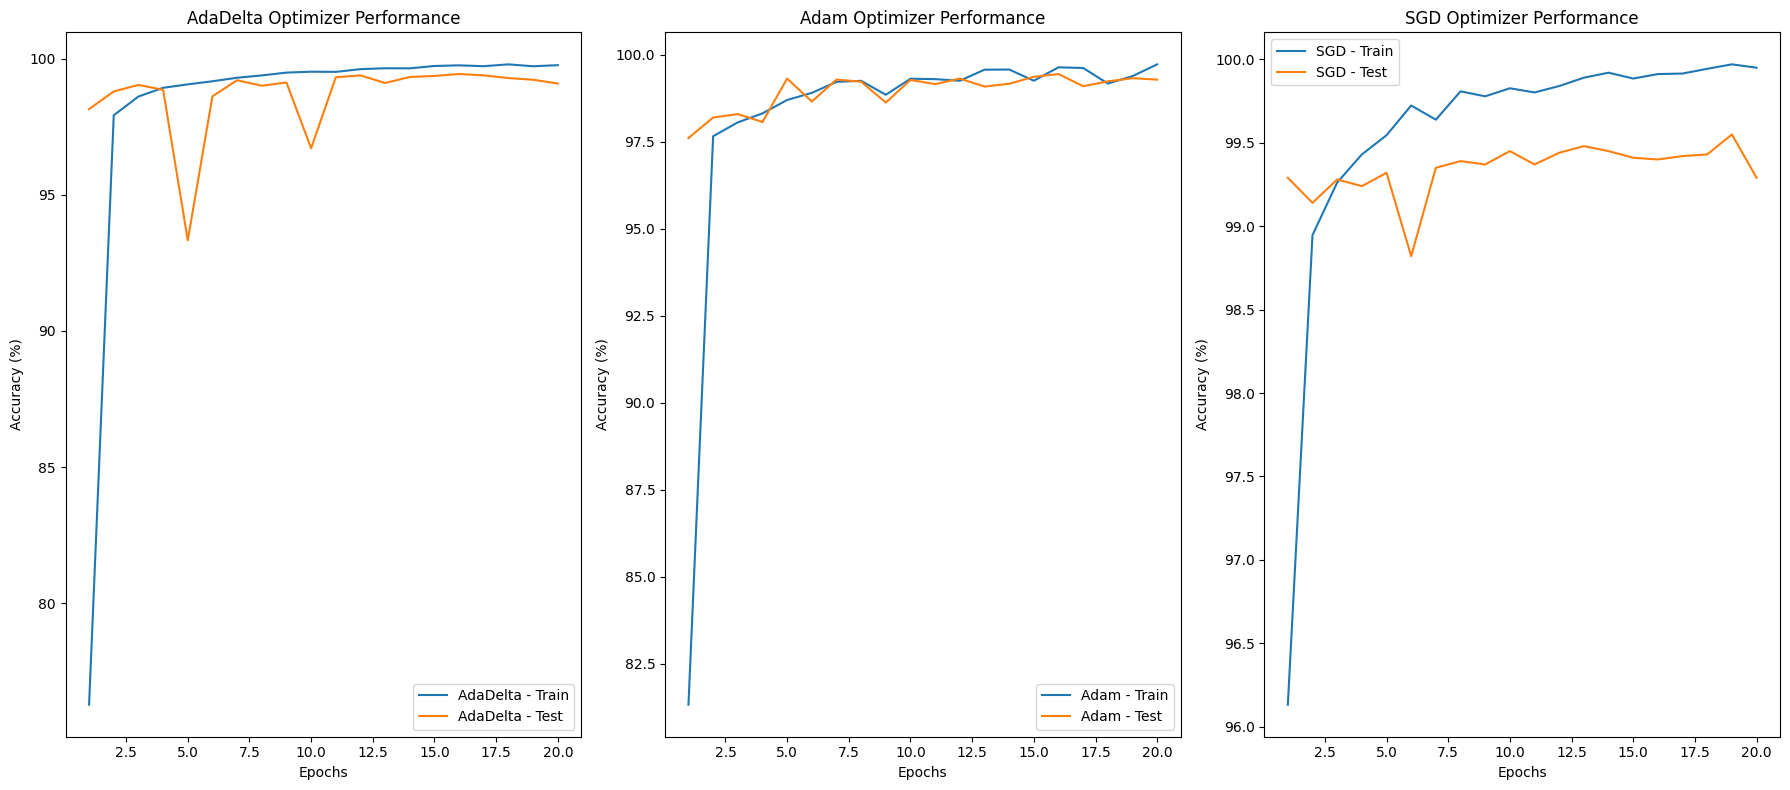

In [48]:
# Plot training and test accuracies
epochs_range = range(1, 21)
plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
plt.plot(epochs_range, train_acc_adadelta, label='AdaDelta - Train')
plt.plot(epochs_range, test_acc_adadelta, label='AdaDelta - Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('AdaDelta Optimizer Performance')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(epochs_range, train_acc_adam, label='Adam - Train')
plt.plot(epochs_range, test_acc_adam, label='Adam - Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Adam Optimizer Performance')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(epochs_range, train_acc_sgd, label='SGD - Train')
plt.plot(epochs_range, test_acc_sgd, label='SGD - Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('SGD Optimizer Performance')
plt.legend()
plt.savefig('optimizer_3sep.svg')
plt.tight_layout()
plt.show()

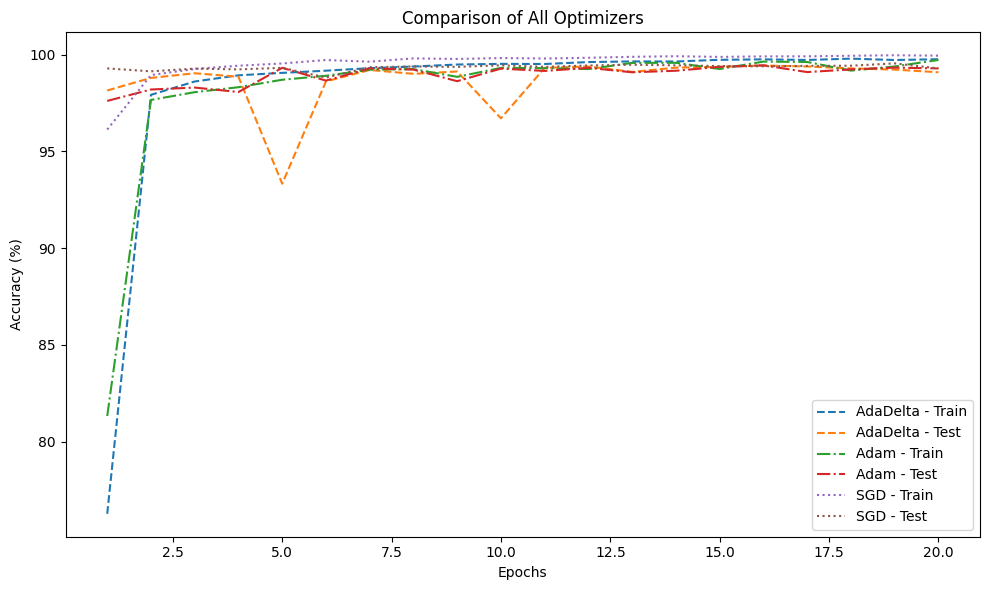

In [50]:
# Plot comparison of all optimizers
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_acc_adadelta, label='AdaDelta - Train', linestyle='--')
plt.plot(epochs_range, test_acc_adadelta, label='AdaDelta - Test', linestyle='--')
plt.plot(epochs_range, train_acc_adam, label='Adam - Train', linestyle='-.')
plt.plot(epochs_range, test_acc_adam, label='Adam - Test', linestyle='-.')
plt.plot(epochs_range, train_acc_sgd, label='SGD - Train', linestyle=':')
plt.plot(epochs_range, test_acc_sgd, label='SGD - Test', linestyle=':')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of All Optimizers')
plt.legend()
plt.savefig('comparison_all_optimizers.svg')
plt.tight_layout()
plt.show()

#### Exercise 1, Question 6 Relu -> Sigmoid (1,25 pts)

In [51]:
# Define data transforms
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [52]:
# Define the VGG11 model with Sigmoid activation functions
class VGG11_Sigmoid(nn.Module):
    def __init__(self):
        super(VGG11_Sigmoid, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.Sigmoid(),

            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.Sigmoid(),

            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.Sigmoid(),

            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(512, 4096),
            nn.Sigmoid(),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.Sigmoid(),
            nn.Dropout(0.5),
            nn.Linear(4096, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [53]:
# Training function
def train_model_sigmoid(model, optimizer, criterion, trainloader, testloader, epochs=20):
    train_accuracies = []
    test_accuracies = []

    for epoch in range(epochs):
        model.train()
        correct_train = 0
        total_train = 0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Calculate training accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = 100 * correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Evaluate on test set
        model.eval()
        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_accuracy = 100 * correct_test / total_test
        test_accuracies.append(test_accuracy)

        print(f'Epoch {epoch + 1}/{epochs}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

    return train_accuracies, test_accuracies

In [54]:
# Define loss function
criterion = nn.CrossEntropyLoss()

In [55]:
# Train using SGD optimizer (as used in Exercise 1.2)
model_sigmoid = VGG11_Sigmoid().to(device)
optimizer_sgd = optim.SGD(model_sigmoid.parameters(), lr=0.01, momentum=0.9)
print("\nTraining with SGD Optimizer and Sigmoid Activations:")
train_acc_sigmoid, test_acc_sigmoid = train_model_sigmoid(model_sigmoid, optimizer_sgd, criterion, trainloader, testloader, epochs=20)


Training with SGD Optimizer and Sigmoid Activations:
Epoch 1/20, Train Accuracy: 43.05%, Test Accuracy: 11.15%
Epoch 2/20, Train Accuracy: 91.52%, Test Accuracy: 44.72%
Epoch 3/20, Train Accuracy: 96.62%, Test Accuracy: 71.08%
Epoch 4/20, Train Accuracy: 97.77%, Test Accuracy: 90.50%
Epoch 5/20, Train Accuracy: 98.22%, Test Accuracy: 97.35%
Epoch 6/20, Train Accuracy: 98.62%, Test Accuracy: 77.06%
Epoch 7/20, Train Accuracy: 98.95%, Test Accuracy: 97.75%
Epoch 8/20, Train Accuracy: 98.94%, Test Accuracy: 92.37%
Epoch 9/20, Train Accuracy: 99.11%, Test Accuracy: 98.60%
Epoch 10/20, Train Accuracy: 99.34%, Test Accuracy: 95.33%
Epoch 11/20, Train Accuracy: 99.34%, Test Accuracy: 83.97%
Epoch 12/20, Train Accuracy: 99.45%, Test Accuracy: 97.25%
Epoch 13/20, Train Accuracy: 99.40%, Test Accuracy: 98.12%
Epoch 14/20, Train Accuracy: 99.56%, Test Accuracy: 98.38%
Epoch 15/20, Train Accuracy: 99.65%, Test Accuracy: 99.10%
Epoch 16/20, Train Accuracy: 99.71%, Test Accuracy: 98.79%
Epoch 17/20

In [60]:
# Save the model
PATH = './vgg11_sigmoid_mnist.pth'
torch.save(model_sigmoid.state_dict(), PATH)
print('Model saved to', PATH)

Model saved to ./vgg11_sigmoid_mnist.pth


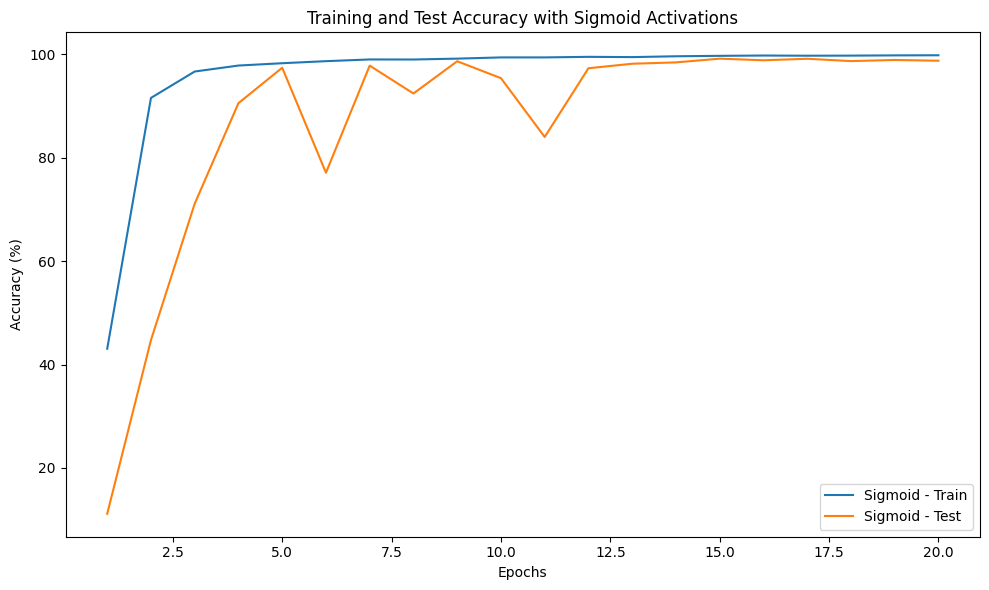

In [58]:
# Plot training and test accuracies
epochs_range = range(1, 21)
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_acc_sigmoid, label='Sigmoid - Train')
plt.plot(epochs_range, test_acc_sigmoid, label='Sigmoid - Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy with Sigmoid Activations')
plt.legend()
plt.tight_layout()
plt.savefig('sigmoid_activation_performance.png')
plt.show()


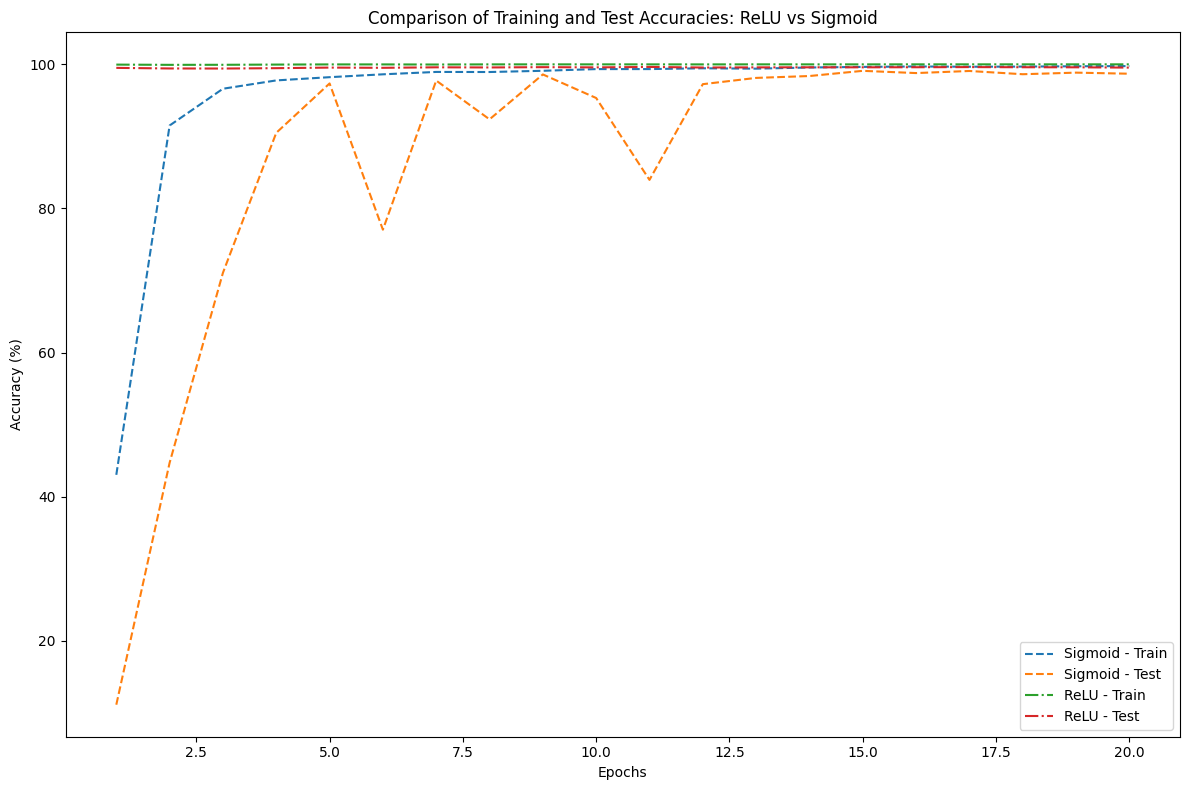

In [59]:
# Comparison with ReLU results (from Exercise 1.2)
plt.figure(figsize=(12, 8))

plt.plot(epochs_range, train_acc_sigmoid, label='Sigmoid - Train', linestyle='--')
plt.plot(epochs_range, test_acc_sigmoid, label='Sigmoid - Test', linestyle='--')
plt.plot(epochs_range, train_accuracies, label='ReLU - Train', linestyle='-.')
plt.plot(epochs_range, test_accuracies, label='ReLU - Test', linestyle='-.')

plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Training and Test Accuracies: ReLU vs Sigmoid')
plt.legend()
plt.tight_layout()
plt.savefig('comparison_relu_sigmoid.png')
plt.show()


#### Exercise 1, Question 7: Remove Dropout (1.25 pts)

In [61]:
# Define the VGG11 model without Dropout layers
class VGG11_NoDropout(nn.Module):
    def __init__(self):
        super(VGG11_NoDropout, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(512, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


In [62]:
# Training function
def train_model(model, optimizer, criterion, trainloader, testloader, epochs=20):
    train_accuracies = []
    test_accuracies = []

    for epoch in range(epochs):
        model.train()
        correct_train = 0
        total_train = 0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Calculate training accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = 100 * correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Evaluate on test set
        model.eval()
        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_accuracy = 100 * correct_test / total_test
        test_accuracies.append(test_accuracy)

        print(f'Epoch {epoch + 1}/{epochs}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

    return train_accuracies, test_accuracies


In [64]:
# Define loss function
criterion = nn.CrossEntropyLoss()

In [65]:
# Train using SGD optimizer (as used in Exercise 1.2)
model_nodropout = VGG11_NoDropout().to(device)
optimizer_sgd = optim.SGD(model_nodropout.parameters(), lr=0.01, momentum=0.9)
print("\nTraining with SGD Optimizer and No Dropout:")
train_acc_nodropout, test_acc_nodropout = train_model(model_nodropout, optimizer_sgd, criterion, trainloader, testloader, epochs=20)


Training with SGD Optimizer and No Dropout:
Epoch 1/20, Train Accuracy: 96.90%, Test Accuracy: 98.58%
Epoch 2/20, Train Accuracy: 99.05%, Test Accuracy: 99.12%
Epoch 3/20, Train Accuracy: 99.38%, Test Accuracy: 99.48%
Epoch 4/20, Train Accuracy: 99.49%, Test Accuracy: 99.43%
Epoch 5/20, Train Accuracy: 99.60%, Test Accuracy: 99.22%
Epoch 6/20, Train Accuracy: 99.73%, Test Accuracy: 99.25%
Epoch 7/20, Train Accuracy: 99.79%, Test Accuracy: 99.34%
Epoch 8/20, Train Accuracy: 99.75%, Test Accuracy: 99.42%
Epoch 9/20, Train Accuracy: 99.85%, Test Accuracy: 99.45%
Epoch 10/20, Train Accuracy: 99.86%, Test Accuracy: 99.46%
Epoch 11/20, Train Accuracy: 99.87%, Test Accuracy: 99.47%
Epoch 12/20, Train Accuracy: 99.90%, Test Accuracy: 99.43%
Epoch 13/20, Train Accuracy: 99.88%, Test Accuracy: 99.42%
Epoch 14/20, Train Accuracy: 99.86%, Test Accuracy: 99.54%
Epoch 15/20, Train Accuracy: 99.95%, Test Accuracy: 99.43%
Epoch 16/20, Train Accuracy: 99.94%, Test Accuracy: 99.61%
Epoch 17/20, Train A

In [66]:
# Save the model without Dropout
PATH = './vgg11_nodropout_mnist.pth'
torch.save(model_nodropout.state_dict(), PATH)
print('Model saved to', PATH)

Model saved to ./vgg11_nodropout_mnist.pth


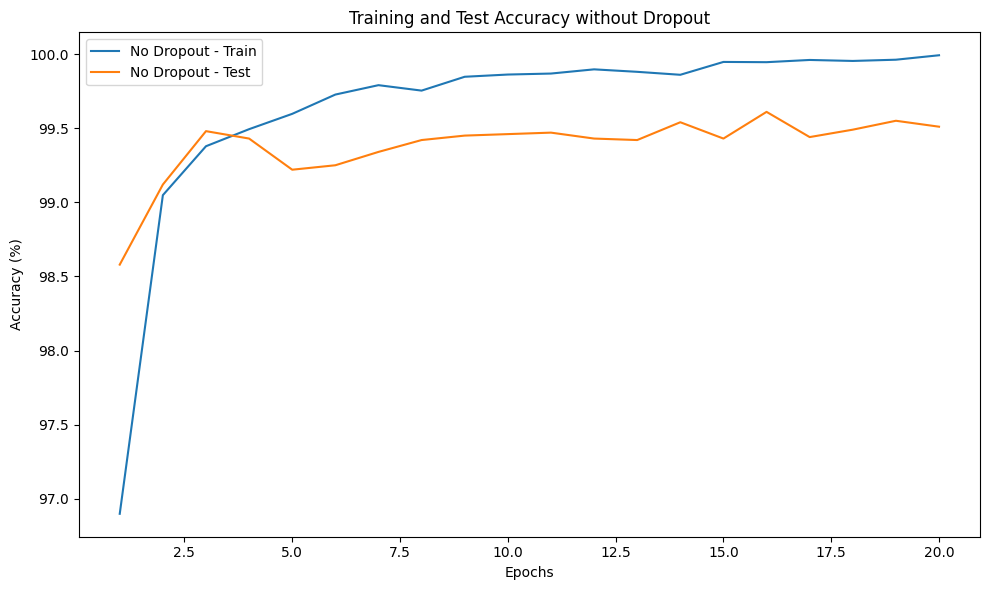

In [67]:
# Plot training and test accuracies for No Dropout
epochs_range = range(1, 21)
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_acc_nodropout, label='No Dropout - Train')
plt.plot(epochs_range, test_acc_nodropout, label='No Dropout - Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy without Dropout')
plt.legend()
plt.tight_layout()
plt.savefig('nodropout_performance.png')
plt.show()


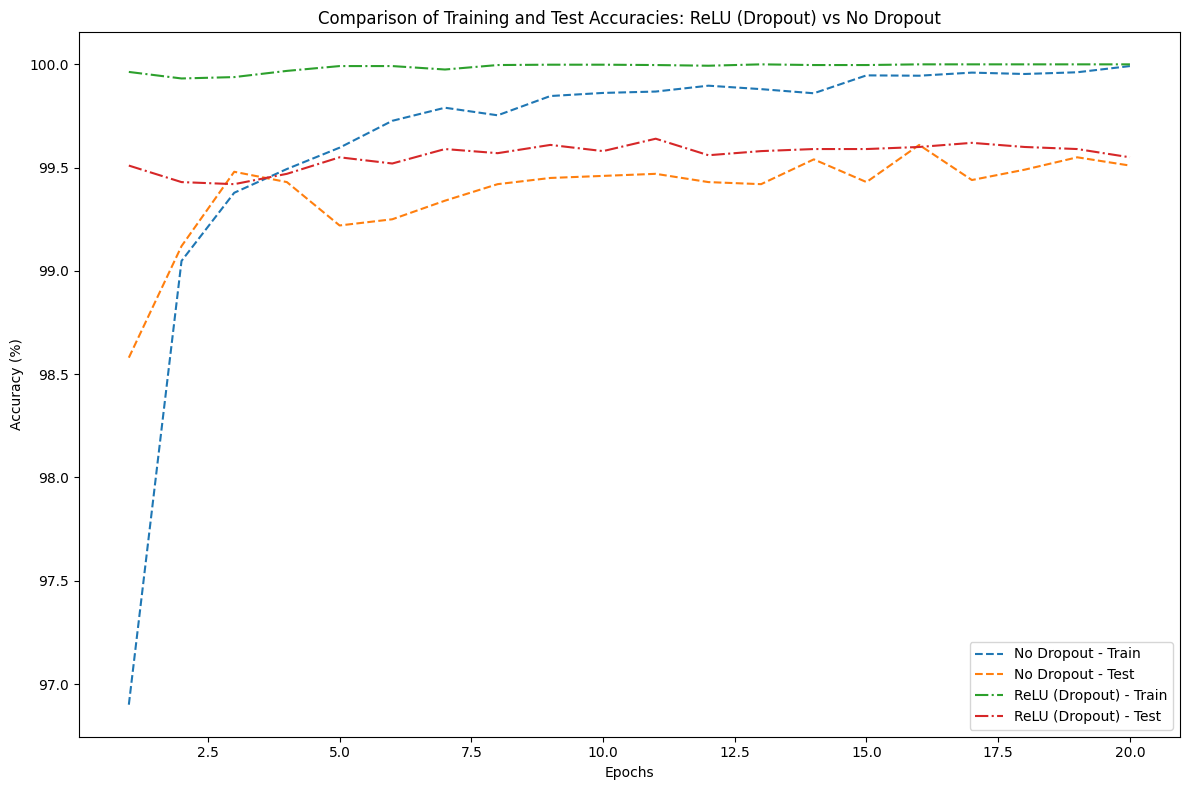

In [68]:
# Comparison with ReLU results (from Exercise 1.2)
plt.figure(figsize=(12, 8))

plt.plot(epochs_range, train_acc_nodropout, label='No Dropout - Train', linestyle='--')
plt.plot(epochs_range, test_acc_nodropout, label='No Dropout - Test', linestyle='--')
plt.plot(epochs_range, train_accuracies, label='ReLU (Dropout) - Train', linestyle='-.')
plt.plot(epochs_range, test_accuracies, label='ReLU (Dropout) - Test', linestyle='-.')

plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Training and Test Accuracies: ReLU (Dropout) vs No Dropout')
plt.legend()
plt.tight_layout()
plt.savefig('comparison_relu_nodropout.png')
plt.show()